Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Multivarijatna analiza podataka - ak. god. 2022/2023  
http://www.fer.unizg.hr/predmet/map

### Prva laboratorijska vježba - Geometrija uzorka, multivarijatna normalna razdioba, statističko zaključivanje

**Rok za predaju: 2. travnja 2023. u 23:59h**

------------------------------

### Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima, te morate pokazati da razumijete sav kôd koji ste napisali.** Zadatci u samoj vježbi su istraživačkog tipa - ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje.

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. **Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

------------------------------

In [122]:
# Fiksirajte "seed" kako bi ispravno rekonstruirali i verificali eksperimente
# <Vaš kôd ovdje>
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import random
import pandas as pd
import scipy.stats
from statsmodels.multivariate.manova import MANOVA

np.random.seed(123)

### 1. Geometrija uzorka i slučajno uzorkovanje

Neka je dan idući uzorak s $n = 4$ opservacije i $p = 3$ varijabli:

$$
\mathbf{X} = 
\begin{bmatrix}
10 & 3 & 2 \\
7 & 2 & 6 \\
8 & 1 & 3 \\ 
7 & 1 & 4  
\end{bmatrix}
$$

#### (a) 

Izračunajte i ispišite uzorački vektor srednjih vrijednosti $\overline{\mathbf{x}}$, uzoračku matricu kovarijance $\mathbf{S}$ i uzoračku matricu korelacije $\mathbf{R}$. 

In [35]:
# <Vaš kôd ovdje>
X = np.array([[10, 3, 2], [7, 2,6], [8, 1, 3], [7, 1, 4]])

print(f'Matrica X:\n{X}\n')
x_mean = X.mean(axis=0)

print(f'Vektor srednjih vrijednosti: {x_mean}\n')

S = np.cov(X.T)
print(f'Matrica kovarijacije:\n {S} \n')

R = np.corrcoef(X.T)
print(f'Matrica korelacije:\n {R}')


Matrica X:
[[10  3  2]
 [ 7  2  6]
 [ 8  1  3]
 [ 7  1  4]]

Vektor srednjih vrijednosti: [8.   1.75 3.75]

Matrica kovarijacije:
 [[ 2.          1.         -2.        ]
 [ 1.          0.91666667 -0.41666667]
 [-2.         -0.41666667  2.91666667]] 

Matrica korelacije:
 [[ 1.          0.73854895 -0.82807867]
 [ 0.73854895  1.         -0.2548236 ]
 [-0.82807867 -0.2548236   1.        ]]


Vizualizirajte graf raspršenja između prve i druge varijable, zatim prve i treće varijable. Usporedite grafove sa vrijednostima kovarijance i korelacije između tih varijabli.

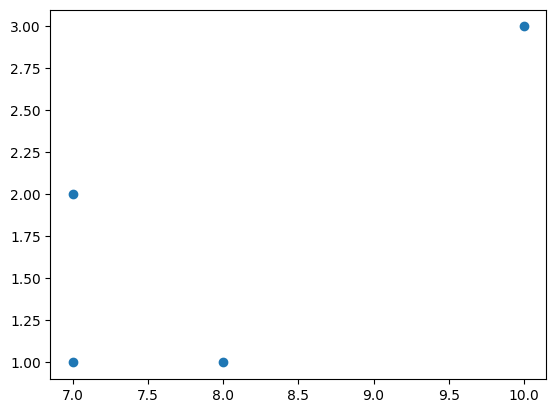

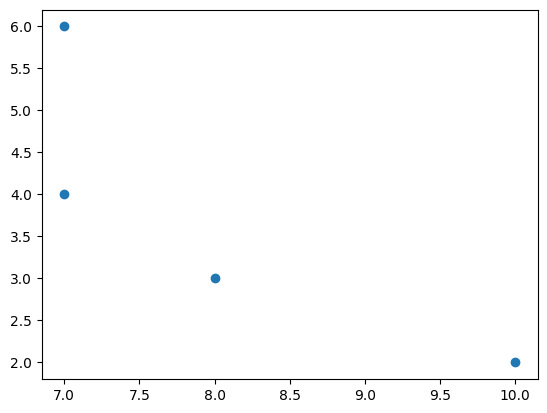

In [36]:
# <Vaš kôd ovdje>
plt.scatter(X[:,0], X[:,1])
plt.show()
plt.scatter(X[:,0], X[:,2])
plt.show()

 Izračunajte statističku udaljenost:
 
 $$
 d\,(\mathbf{x}_1, \mathbf{x}_2) = ((\mathbf{x}_1 - \mathbf{x}_2)^\intercal \, \mathbf{S}^{-1} (\mathbf{x}_1 - \mathbf{x}_2)
 $$
  
 između prve i zadnje opservacije $d\,(\mathbf{x}_1, \mathbf{x}_4)$. Usporedite ju s euklidskom udaljenošću.

In [37]:
# <Vaš kôd ovdje>
x1 = X[0,:]
x4 = X[3,:]

d_stat = (x1 - x4).dot(np.linalg.inv(S)).dot((x1 - x4))
print(d_stat)

d_euk = np.sqrt(np.sum((x1 - x4)**2))
print(d_euk)

6.000000000000021
4.123105625617661


#### (b) 
Neka $\mathbf{x}_i \in \mathbb{R}^{n \times 1}$ predstavlja vektor vrijednosti varijable $i$  (iz uzorka $\mathbf{X}$), a $\overline{x}_i$ predstavlja uzoračku srednju vrijednost varijable $i$. Za svaku varijablu $i$, izračunajte vektor devijacija (reziduala) $\mathbf{d}_i = \mathbf{x}_i - \overline{x}_i \mathbf{1}$. Usporedite duljinu vektora devijacija sa standardnom devijacijom varijable.

In [38]:
# <Vaš kôd ovdje>

for i in range(0,3):
    x_i = X[:,i]
    vek_dev = x_i-(np.ones(4).dot(x_mean[i]))
    print(f'Vektor devijacija {i+1}. varijable je: {vek_dev}. Duljina vektora devijacija je: {np.sqrt(np.sum((vek_dev - 0)**2))}, a standardna devijacije je: {np.std(x_i)}')

Vektor devijacija 1. varijable je: [ 2. -1.  0. -1.]. Duljina vektora devijacija je: 2.449489742783178, a standardna devijacije je: 1.224744871391589
Vektor devijacija 2. varijable je: [ 1.25  0.25 -0.75 -0.75]. Duljina vektora devijacija je: 1.6583123951777, a standardna devijacije je: 0.82915619758885
Vektor devijacija 3. varijable je: [-1.75  2.25 -0.75  0.25]. Duljina vektora devijacija je: 2.958039891549808, a standardna devijacije je: 1.479019945774904


Generirajte $M = 1000$ realizacija slučajnog vektora dimenzije $4 \times 1$, gdje je svaka varijabla vektora iz diskretne uniformne razdiobe $\mathcal{U}\{0,10\}$. Za svaku varijablu izračunajte standardnu devijaciju i duljinu vektora devijacija. Na grafu prikažite standardnu devijaciju kao funkciju u ovisnosti o duljini vektora devijacija.

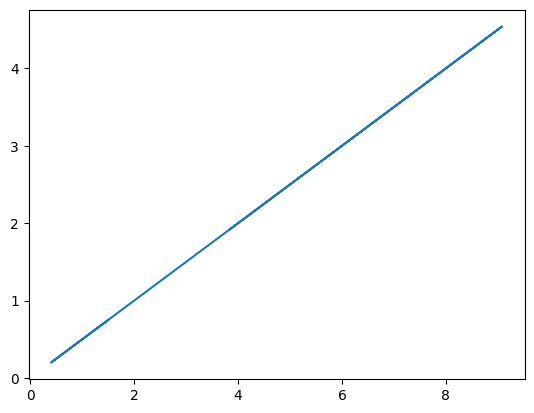

In [39]:
# <Vaš kôd ovdje>
M = 1000
std_devs = list()
vec_devs_lens = list()
for i in range(0,M):
    x_i = np.random.uniform(0,10,4)
    x_meanb = x_i.mean()
    std_devs.append(np.std(x_i))
    vek_dev = x_i-(np.ones(4).dot(x_meanb))   
    vec_devs_lens.append(np.sqrt(np.sum((vek_dev - 0)**2)))
plt.plot(vec_devs_lens,std_devs)
plt.show()


#### (c) 
Preko izračunatih vektora devijacija $\mathbf{d}_i$ rekonstruirajte matricu kovarijance $\mathbf{S}$, a zatim i matricu korelacije $\mathbf{R}$. Dokažite da su rekonstruirane matrice jednake gore izračunatima.

In [40]:
# <Vaš kôd ovdje>

vek_dev1 = X[:,0]-(np.ones(4).dot(x_mean[0]))
vek_dev2 = X[:,1]-(np.ones(4).dot(x_mean[1]))
vek_dev3 = X[:,2]-(np.ones(4).dot(x_mean[2]))

vek_dev = [vek_dev1,vek_dev2,vek_dev3]
print(f'Matrica kovarijance:')
for idx, vek1 in enumerate(vek_dev):
    for jdx, vek2 in enumerate(vek_dev):
        print(f'{(vek1.dot(vek2))/3}',end=" ")
    print()

print(f'\nMatrica korelacije:')
for idx, vek1 in enumerate(vek_dev):
    for jdx, vek2 in enumerate(vek_dev):
        print(f'{((vek1.dot(vek2))/3)/((np.sqrt((vek1.dot(vek1))/3))*(np.sqrt((vek2.dot(vek2))/3)))}',end=" ")
    print()


Matrica kovarijance:
2.0 1.0 -2.0 
1.0 0.9166666666666666 -0.4166666666666667 
-2.0 -0.4166666666666667 2.9166666666666665 

Matrica korelacije:
0.9999999999999998 0.7385489458759963 -0.828078671210825 
0.7385489458759963 1.0 -0.2548235957188128 
-0.828078671210825 -0.2548235957188128 1.0 


#### (d) 
Izračunajte uzoračku generaliziranu varijancu $|\mathbf{S}|$ uzorka $\mathbf{X}$. Zatim dodajte novu varijablu koja je linearna kombinacija prve i druge varijable $\mathbf{x}_3 = \mathbf{x}_0 + \mathbf{x}_1$. Izračunajte uzoračku generaliziranu varijancu na novom uzorku.

In [41]:
# <Vaš kôd ovdje>
S_gen = np.linalg.det(S)

X_new = X.copy()

new_col = X[:,0,None] + X[:,1,None]
X_new = np.append(X_new,new_col,axis=1)
S_new = np.cov(X_new.T)
S_new_gen = np.linalg.det(S_new)
print(f'Generalizirana varijanca: {S_gen}\nGeneralizirana varijanca sa dodanom varijablom: {S_new_gen}')



Generalizirana varijanca: 0.08333333333333307
Generalizirana varijanca sa dodanom varijablom: -3.7007434154172e-17


Maknite zadnju opservaciju iz originalnog uzorka $\mathbf{X}$. Izračunajte uzoračku generaliziranu varijancu i svojstvene vektore na novom uzorku. Što možete zaključiti iz ovog i prethodnog primjera?

In [42]:
# <Vaš kôd ovdje>
X_new = X[:-1,:]
S_new = np.cov(X_new.T)
print(X_new)
S_new_gen = np.linalg.det(S_new)
print(S_new_gen)
eigenval, eigenvec = np.linalg.eig(X_new)
print(f'Svojstvene vrijednosti: {eigenval}\n')
print(f'Svojstvene vektori: {eigenvec}\n')


[[10  3  2]
 [ 7  2  6]
 [ 8  1  3]]
0.0
Svojstvene vrijednosti: [14.40106346+0.j          0.29946827+2.07002311j  0.29946827-2.07002311j]

Svojstvene vektori: [[ 0.63162067+0.j         -0.23723844-0.14553246j -0.23723844+0.14553246j]
 [ 0.59626722+0.j          0.84213186+0.j          0.84213186-0.j        ]
 [ 0.49550049+0.j          0.03809953+0.46032661j  0.03809953-0.46032661j]]



### 2. Multivarijatna normalna razdioba

Generirajte uzorak $\mathbf{X} \in \mathbb{R}^{1000x2}$ iz multivarijatne normalne razdiobe određene parametrima:

$$
\mathbf{\mu} = [2, 3],
\mathbf{\Sigma} = 
\begin{bmatrix}
10^2 & 6^2 \\
6^2 & 6^2 \\
\end{bmatrix}
$$

In [129]:
# <Vaš kôd ovdje>
mean = (2, 3)
cov = [[10**2, 6**2], [6**2, 6**2]]
x = np.random.multivariate_normal(mean, cov, (1000))
x.shape

(1000, 2)

#### (a) 

Prikažite graf raspršenja dviju varijabli. Na istom grafu prikažite gustoću razdiobe uz pomoć elipsi za nekoliko različitih veličina $c^2$, gdje su točke $\mathbf{x}$ sve točke koje imaju jednaku udaljenost $c^2$ od središta $\mathbf{\mu}$:

$$
c^2 =(\mathbf{x} - \mathbf{\mu})^\intercal \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu})
$$
Pripazite da osi grafa budu na istoj skali.

**Hint**: Pogledajte `contour` funkciju u R-u, ili `plt.contour` funkciju u Pythonu (`matplotlib` biblioteka)

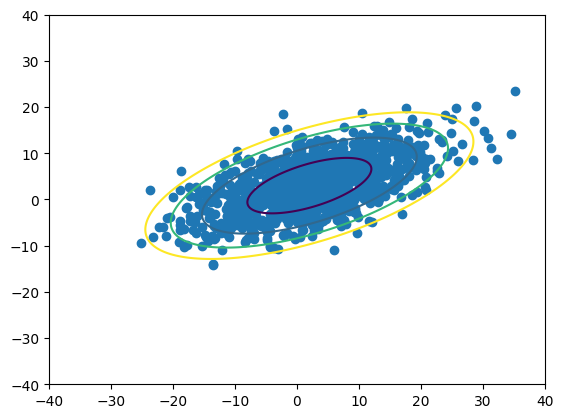

In [131]:
# <Vaš kôd ovdje>
x1 = x[:,0]
x2 = x[:,1]
plt.scatter(x1,x2)
plt.ylim((-40,40))
plt.xlim((-40,40))
delta = 0.08
x_ = np.arange(-40.0, 40.0, delta)
y_ = np.arange(-40.0, 40.0, delta)
X_, Y_ = np.meshgrid(x_, y_)
inverse = np.linalg.inv(cov)
Z = np.zeros((1000,1000))
for idx in range(0,1000):
    for jdx in range(0,1000):
        point = np.matrix([X_[idx,jdx],Y_[idx,jdx]])
        minus = point - mean
        Z[idx,jdx] = minus.dot(inverse).dot(minus.T)
        
    

plt.contour(X_,Y_,Z,[1,3,5,7])

plt.show()


#### (b)

Prikažite tri grafa raspršenja i pripadajućih elipsi uzorkovanjem iz multivarijatne normalne razdiobe s istim $\mu$ iz prošlog podzadatka i različitim matricama kovarijanci:

$$
\mathbf{\Sigma_1} = 
\begin{bmatrix}
10^2 & 6^2 \\
6^2 & 10^2 \\
\end{bmatrix},
\mathbf{\Sigma_2} = 
\begin{bmatrix}
10^2 & 7^2 \\
7^2 & 6^2 \\
\end{bmatrix}
\mathbf{\Sigma_3} = 
\begin{bmatrix}
10^2 & 8^2 \\
8^2 & 6^2 \\
\end{bmatrix}
$$
Ukoliko nije moguće prikazati grafove raspršenja, pokažite zašto.

C:\Users\matij\AppData\Local\Temp\ipykernel_7360\1901960139.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  x3 = np.random.multivariate_normal(mean, cov3, (1000))


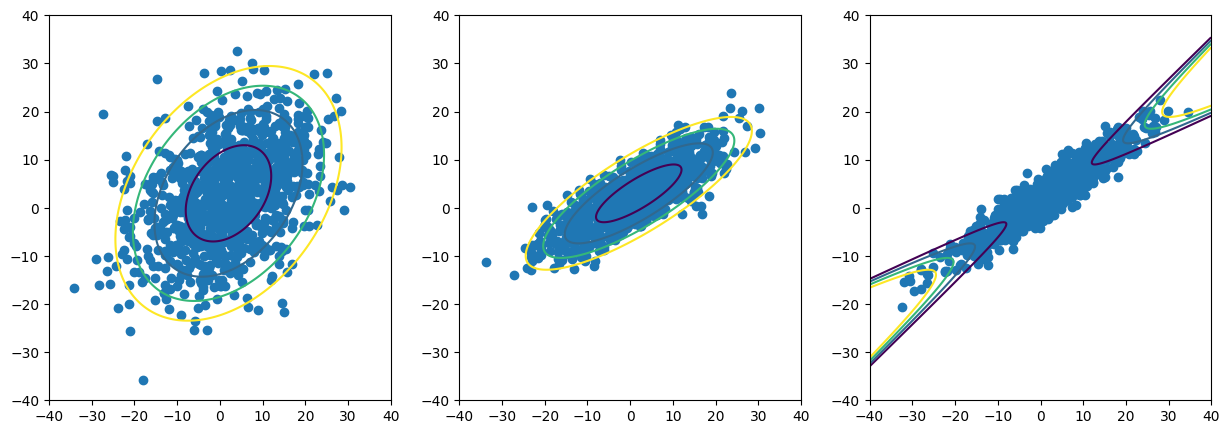

In [132]:
# <Vaš kôd ovdje>
cov1 = [[10**2, 6**2], [6**2, 10**2]]
cov2 = [[10**2, 7**2], [7**2, 6**2]]
cov3 = [[10**2, 8**2], [8**2, 6**2]]
x1 = np.random.multivariate_normal(mean, cov1, (1000))
x2 = np.random.multivariate_normal(mean, cov2, (1000))
x3 = np.random.multivariate_normal(mean, cov3, (1000))
fig, axs = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
axs[0].scatter(x1[:,0], x1[:,1])
axs[0].set_xlim([-40, 40])
axs[0].set_ylim([-40, 40])
axs[1].scatter(x2[:,0], x2[:,1])
axs[1].set_xlim([-40, 40])
axs[1].set_ylim([-40, 40])
axs[2].scatter(x3[:,0], x3[:,1])
axs[2].set_xlim([-40, 40])
axs[2].set_ylim([-40, 40])
Zs = [np.zeros((1000,1000)),np.zeros((1000,1000)),np.zeros((1000,1000))]
inverses = [np.linalg.inv(cov1),np.linalg.inv(cov2),np.linalg.inv(cov3)]
for zdx, inverse in enumerate(inverses):
    Z = np.zeros((1000,1000))
    for idx in range(0,1000):
        for jdx in range(0,1000):
            point = np.matrix([X_[idx,jdx],Y_[idx,jdx]])
            minus = point - mean
            Zs[zdx][idx,jdx] = minus.dot(inverse).dot(minus.T)

axs[0].contour(X_,Y_,Zs[0],[1,3,5,7])
axs[1].contour(X_,Y_,Zs[1],[1,3,5,7])
axs[2].contour(X_,Y_,Zs[2],[1,3,5,7])

#### (c)

Promatramo $\mathbf{\Sigma}_1$ i $\mathbf{\Sigma}_2$ iz prošlog podzadatka. Neka su $\mathbf{X}_1 \sim \mathbf{\mathcal{N}}(\mathbf{\mu, \mathbf{\Sigma}_1)}$ i $\mathbf{X}_2 \sim \mathbf{\mathcal{N}}(\mathbf{\mu, \mathbf{\Sigma}_2)}$ slučajni dvo-dimenzionalni vektori, i neka je $\mathbf{X}_r$ slučajni vektor određen izrazom $\mathbf{X}_r = \mathbf{X}_1 - \mathbf{X}_2$. Odredite populacijske parametre koji određuju $\mathbf{X}_r \sim \mathbf{\mathcal{N}}(\mathbf{\mu}_r, \mathbf{\Sigma}_r)$.

In [46]:
# <Vaš kôd ovdje>
mi_r = np.subtract(np.array(mean),np.array(mean))
print(f'Mean: {mi_r}\n')
cov_r = [[0,0],[0,0]]
for i in range(0,2):
    for j in range(0,2):
        cov_r[i][j] = cov1[i][j] + cov2[i][j]
print(cov_r)


Mean: [0 0]

[[200, 85], [85, 136]]


Procjenite iste te parametre uzorkovanjem $n=10^7$ opservacija iz $\mathbf{X_1}$ i $\mathbf{X_2}$.

In [47]:
# <Vaš kôd ovdje>
n=10**7

x_a = np.random.multivariate_normal(mean, cov1, (n))
x_a.shape
x_b = np.random.multivariate_normal(mean, cov2, (n))
x_b.shape

mu_a = np.average(x_a,axis=0)
mu_b = np.average(x_b,axis=0)
cov_a = (1/n)*(np.array(x_a-mu_a)).T.dot(np.array(x_a-mu_a))
cov_b = (1/n)*(np.array(x_b-mu_b)).T.dot(np.array(x_b-mu_b))
print(f'Procjena mu X1: {mu_a}')
print(f'Procjena kovarijaciske matrice X1: {cov_a}\n')
print(f'Procjena mu X2: {mu_b}')
print(f'Procjena kovarijaciske matrice X2: {cov_b}\n')

mi_r = np.subtract(np.array(mu_a),np.array(mu_b))

print(f'Procjena mu_r: {mi_r}\n')

cov_r = [[0,0],[0,0]]
for i in range(0,2):
    for j in range(0,2):
        cov_r[i][j] = cov_a[i][j] + cov_b[i][j]
print(cov_r)


Procjena mu X1: [1.99846748 2.99682649]
Procjena kovarijaciske matrice X1: [[100.01181763  35.97724579]
 [ 35.97724579  99.99583602]]

Procjena mu X2: [1.99769395 2.9994431 ]
Procjena kovarijaciske matrice X2: [[99.95884679 48.96855615]
 [48.96855615 35.98153652]]

Procjena mu_r: [ 0.00077353 -0.00261662]

[[199.97066441469076, 84.94580193446568], [84.94580193446568, 135.9773725415315]]


Procjenite parametre procjenitelja $\overline{\mathbf{X}}_r \sim \mathbf{\mathcal{N}}(\mathbf{\mu}_1, (1/n)\mathbf{\Sigma}_1)$ uzorkovanjem iz $\mathbf{X_1}$ i $\mathbf{X_2}$ na sljedeći način: generirajte $K = 10^5$ uzoraka, gdje svaki uzorak ima $n = 100$ opservacija.

In [176]:
# <Vaš kôd ovdje>
K = 10**5
n = 100

mu = np.array([0,0])
for idx in range(0,K):
    x_a = np.random.multivariate_normal(mean, cov1, (n))
    x_b = np.random.multivariate_normal(mean, cov2, (n))
    x_r = x_a - x_b
    
    x_avg = np.array(np.average(x_r,axis=0))
    mu = np.vstack([mu,x_avg])
print(mu.shape)
mu = np.delete(mu, (0), axis=0)
mu_avg = np.mean(mu,axis=0)
print(mu_avg)
print(np.cov(mu.T)*n)


(100001, 2)
[-0.00132935  0.00753196]
[[198.30061943  84.45737043]
 [ 84.45737043 136.07242562]]


### 3. Statističko zaključivanje

Generirajte uzorak $\mathbf{X} \in \mathbb{R}^{1000x2}$ iz multivarijatne normalne razdiobe s parametrima:

$$
\mathbf{\mu} = [2, 3],
\mathbf{\Sigma} = 
\begin{bmatrix}
10^2 & 7^2 \\
7^2 & 6^2 \\
\end{bmatrix}
$$

In [65]:
# <Vaš kôd ovdje>
mean = (2, 3)
cov = [[10**2, 7**2], [7**2, 6**2]]
x = np.random.multivariate_normal(mean, cov, (1000))
x.shape

(1000, 2)

#### (a)

Implementirajte funkciju za određivanje *Hotellingove $T^2$* statistike.

In [66]:
# <Vaš kôd ovdje>
def hotelling_t2(x, mu):
    n, p = x.shape
    x_avg = x.mean(axis=0).reshape((-1,2))
    x_centered = x_avg - mu
    s_inv = np.linalg.inv(np.cov(x.T))
    T2 = n * np.dot(np.dot(x_centered, s_inv), x_centered.T)
    return T2.trace()

Za generirani uzorak testirajte hiptezu $H_0: \mathbf{\mu}= [2, 3]$ naspram $H_1: \mathbf{\mu} \neq [2, 3]$ za razinu značajnosti $\alpha = 0.05$.

In [67]:
# <Vaš kôd ovdje>
alpha = 0.05
mu_0 = np.array([2,3])
mu_0 = np.reshape(mu_0, (-1, 2))
x_avg = x.mean(axis=0).reshape((-1,2))
x_centered = x_avg - mu_0
t_val = hotelling_t2(x,mu_0)
f_val = scipy.stats.f.ppf(q=1-alpha, dfn=2, dfd=1000-2)
crit = ((1000-1)*2)/(1000-2)*f_val
print(t_val,crit)

#Ne odbacujemo nultu hipotezu u korist alternative jer je t_val < kriticna vrijednost

0.8026843795443955 6.015506913325893


#### (b)

Za generirani uzorak, prikažite na grafu $95\%$-tno područje pouzdanosti za $\mathbf{\mu}$ razdiobe.

C:\Users\matij\AppData\Local\Temp\ipykernel_7360\1217554389.py:19: UserWarning: No contour levels were found within the data range.
  plt.contour(X_,Y_,Z,[1])


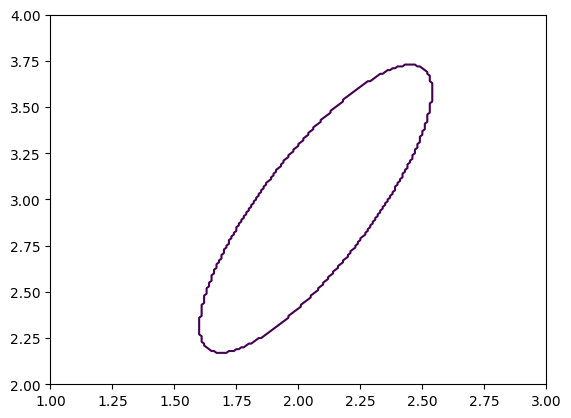

In [68]:
# <Vaš kôd ovdje>
Z = np.zeros((200,200))
delta = 0.01
plt.ylim((2,4))
plt.xlim((1,3))
x_ = np.arange(1, 3, delta)
y_ = np.arange(2, 4, delta)
X_, Y_ = np.meshgrid(x_, y_)
f_val = scipy.stats.f.ppf(q=1-alpha, dfn=2, dfd=1000-2)
yidx = 0
crit = ((1000-1)*2)/(1000-2)*f_val
for (a,b) in zip(X_,Y_):
    for idx in range(0,200):
        mu_0 = np.array([a[idx],b[idx]])
        mu_0 = np.reshape(mu_0, (-1, 2))
        if hotelling_t2(x,mu_0) <= crit:
            Z[idx,yidx] = 1
    yidx=yidx+1
plt.contour(X_,Y_,Z,[1])
plt.show()

#### (c)

Uz pomoć simultanih intervala pouzdanosti ($T^2$-interval), odredite $95\%$-tno područje pouzdanosti za srednje vrijednosti varijabli, $\mu_1$ i $\mu_2$, te njihovu razliku $\mu_2 - \mu_1$.

In [180]:
# <Vaš kôd ovdje>
n, p = x.shape
alpha = 0.05
cov = np.cov(x.T)
s11 = cov[0][0]
s22 = cov[1][1]
s12 = cov[0][1]
x_avg = x.mean(axis=0).reshape((-1,2))
x11 = x_avg[0][0]
x22 = x_avg[0][1]
f_val = scipy.stats.f.ppf(q=1-alpha, dfn=p, dfd=n-p)
print(f'Donja granica za mu_1 je {x11 - (np.sqrt( (p*(n-1)/(n-p)) * f_val) * np.sqrt(s11/n))}, a gornja: {x11 + (np.sqrt( (p*(n-1)/(n-p)) * f_val) * np.sqrt(s11/n))}')
print(f'Donja granica za mu_2 je {x22 - (np.sqrt( (p*(n-1)/(n-p)) * f_val) * np.sqrt(s22/n))}, a gornja: {x22 + (np.sqrt( (p*(n-1)/(n-p)) * f_val) * np.sqrt(s22/n))}')
print(f'Donja granica za mu_2 - mu_1 je {x22 - x11 - (np.sqrt( (p*(n-1)/(n-p)) * f_val) * np.sqrt((s22+s11-2*s12)/n))}, a gornja: {x22 - x11 + (np.sqrt( (p*(n-1)/(n-p)) * f_val) * np.sqrt((s22+s11-2*s12)/n))}')



Donja granica za mu_1 je 1.478618978645876, a gornja: 3.0178378314935754
Donja granica za mu_2 je 2.6215294279773955, a gornja: 3.530340519209636
Donja granica za mu_2 - mu_1 je 0.21698198832928173, a gornja: 1.4384311487182981


Izračunajte univarijatni $t$-interval pouzdanosti za srednju vrijednost svake varijable, a zatim i Bonferronijevu korekciju $t$-intervala. Usporedite s rezultatima dobivenim pomoću $T^2$-intervala.

In [181]:
# <Vaš kôd ovdje>
t_val = scipy.stats.t.ppf(1 - 0.05/2, n - 1)
t_val_corr = scipy.stats.t.ppf(1 - 0.05/(2*p), n - 1)
print(f'(t) Donja granica za mu_1 je {x11 - t_val*np.sqrt((s11/n))}, a gornja: {x11 + t_val*np.sqrt((s11/n))}')
print(f'(t) Donja granica za mu_2 je {x22 - t_val*np.sqrt((s22/n))}, a gornja: {x22 + t_val*np.sqrt((s22/n))}')
print(f'(B) Donja granica za mu_1 je {x11 - t_val_corr*np.sqrt((s11/n))}, a gornja: {x11 + t_val_corr*np.sqrt((s11/n))}')
print(f'(B) Donja granica za mu_2 je {x22 - t_val_corr*np.sqrt((s22/n))}, a gornja: {x22 + t_val_corr*np.sqrt((s22/n))}')

(t) Donja granica za mu_1 je 1.632472134454365, a gornja: 2.863984675685087
(t) Donja granica za mu_2 je 2.7123699567047757, a gornja: 3.439499990482256
(B) Donja granica za mu_1 je 1.5438446914165416, a gornja: 2.95261211872291
(B) Donja granica za mu_2 je 2.6600410737318896, a gornja: 3.491828873455142


Izračunajte $\tilde{\chi}^2$ interval pouzdanosti za velike uzorke za srednju vrijednost svake varijable. Usporedite dobivenu vrijednost s prethodno dobivenim vrijednostima.

In [55]:
# <Vaš kôd ovdje>
chi_val = scipy.stats.chi2.ppf(1-alpha,p)
print(chi_val)
print(f'(chi2) Donja granica za mu_1 je {x11 - np.sqrt(chi_val)*np.sqrt((s11/n))}, a gornja: {x11 + np.sqrt(chi_val)*np.sqrt((s11/n))}')
print(f'(chi2) Donja granica za mu_2 je {x22 - np.sqrt(chi_val)*np.sqrt((s22/n))}, a gornja: {x22 + np.sqrt(chi_val)*np.sqrt((s22/n))}')

5.991464547107979
(chi2) Donja granica za mu_1 je 1.69866876096685, a gornja: 3.281760124703002
(chi2) Donja granica za mu_2 je 2.711680333050135, a gornja: 3.653722684723354


U idućem zadatku ćete provesti ostatak naučenih metoda vezano uz statističko zaključivanje o više vektora sredine.

### 4. Primjena implementiranih metoda

Učitajte podatkovni skup [*iris*](https://archive.ics.uci.edu/ml/datasets/Iris) (postoji mogućnost i učitavanja unutar jezika - [Python](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) / [R](https://technicaljockey.com/r-programming-training/loading-iris-data-set-in-r/)).

In [183]:
# <Vaš kôd ovdje>
from sklearn.datasets import load_iris
data_iris = load_iris()
print(data_iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Procijenite parametre $\mathbf{\mu},\mathbf{\Sigma}$ vezane uz 4 numeričke varijable.

In [184]:
# <Vaš kôd ovdje>
data = data_iris.data
mu = np.mean(data, axis=0)
print(f'mu: {mu} \n')
cov = np.cov(data.T)
print(f'Kovarijaciska matrica: \n {cov}')

mu: [5.84333333 3.05733333 3.758      1.19933333] 

Kovarijaciska matrica: 
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


Provedite analizu normalnosti 4 numeričkih varijabli. Ukoliko je potrebno, predložite koje transformacije biste radili na podatcima kako biste ojačali pretpostavke normalnosti u skupu. 

ShapiroResult(statistic=0.9760899543762207, pvalue=0.01018026564270258)


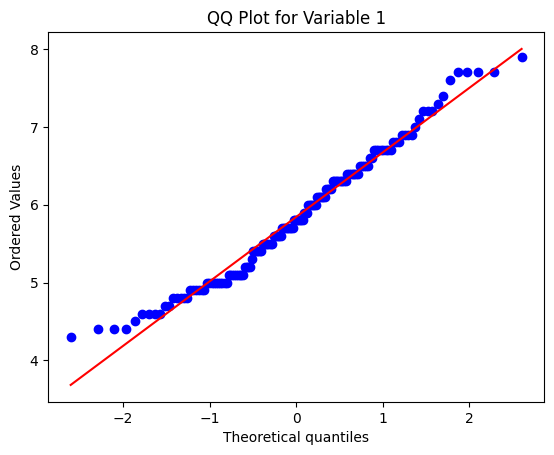

ShapiroResult(statistic=0.9849168062210083, pvalue=0.10112646222114563)


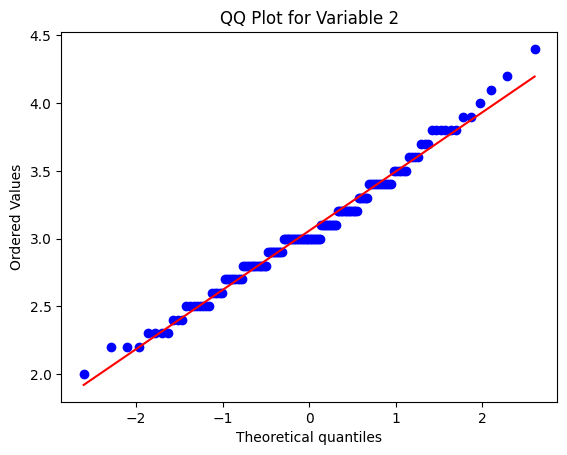

ShapiroResult(statistic=0.8762685656547546, pvalue=7.412652158755861e-10)


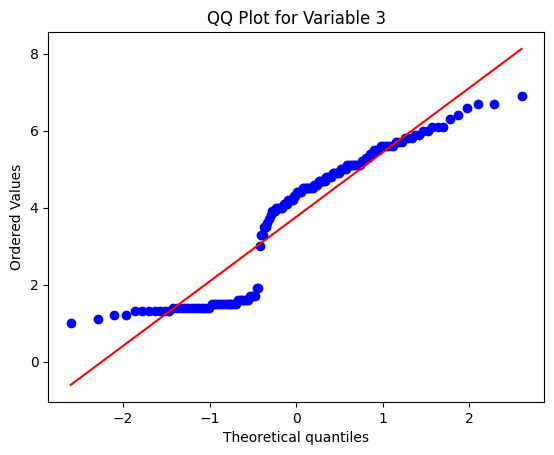

ShapiroResult(statistic=0.9018340706825256, pvalue=1.680264105630158e-08)


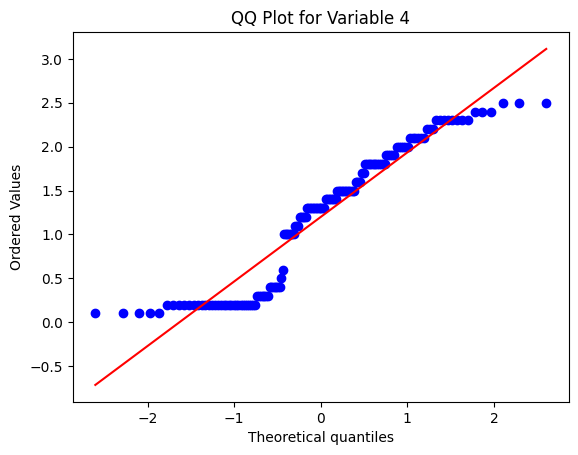

In [58]:
# <Vaš kôd ovdje>
for i in range(data.shape[1]):
    fig, ax = plt.subplots()
    shapiro_test = scipy.stats.shapiro(data[:,i])
    print(shapiro_test)
    scipy.stats.probplot(data[:, i], dist="norm", plot=ax)
    ax.set_title(f"QQ Plot for Variable {i+1}")
    plt.show()

Provedite detekciju stršećih vrijednosti (vizualno/numerički).

**Hint**: Poglavlje 4.7 (Johnson)

Outliers: (array([], dtype=int64),)
Outlier values []


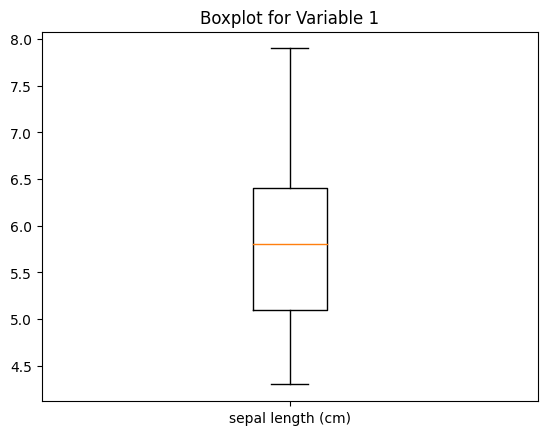

Outliers: (array([15, 32, 33, 60], dtype=int64),)
Outlier values [4.4 4.1 4.2 2. ]


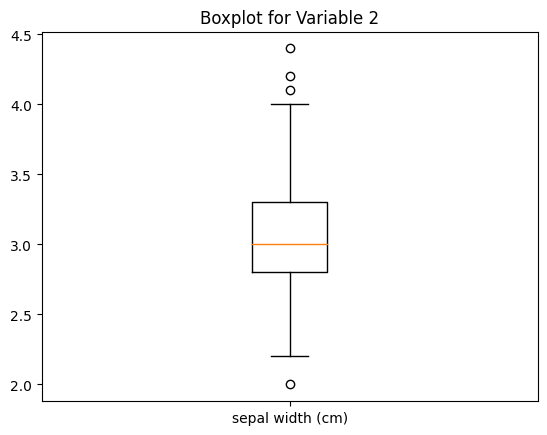

Outliers: (array([], dtype=int64),)
Outlier values []


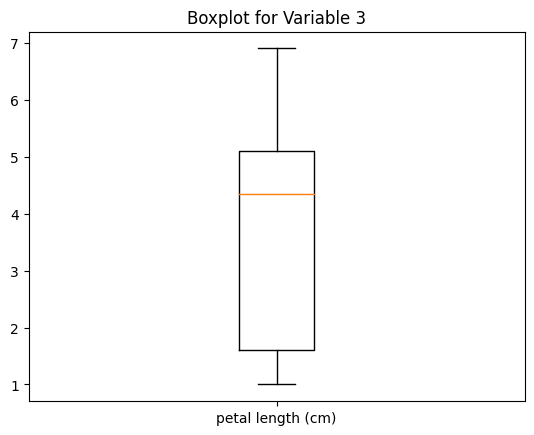

Outliers: (array([], dtype=int64),)
Outlier values []


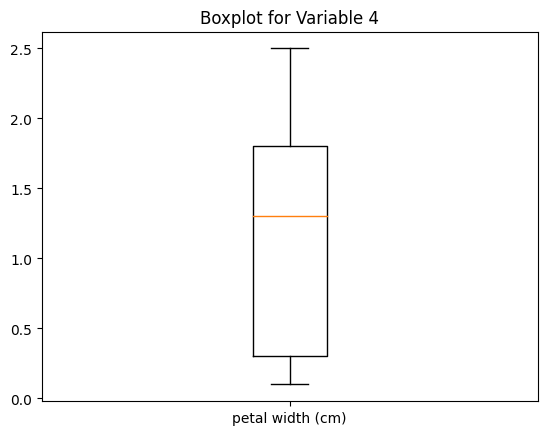

In [80]:
# <Vaš kôd ovdje>
for i in range(data.shape[1]):
    fig, ax = plt.subplots()
    ax.boxplot(data[:, i])
    q1, q3 = np.percentile(data[:,i], [25, 75])
    iqr = q3 - q1
    outliers = np.where((data[:,i] < q1 - 1.5*iqr) | (data[:,i] > q3 + 1.5*iqr))
    print(f'Outliers: {outliers}')
    for outlier in outliers:
        print(f'Outlier values {data[outlier,i]}')
    ax.set_title(f"Boxplot for Variable {i+1}")
    ax.set_xticklabels([data_iris.feature_names[i]])
    plt.show()

Odredite $95\%$-tno područje pouzdanosti za srednje vrijednosti varijabli.

**Hint**: Prethodno implementirani $T^2$-interval/ $t$-interval/ Bonferroni

In [185]:
# <Vaš kôd ovdje>
n,p = data.shape
s11 = cov[0][0]
s22 = cov[1][1]
s33 = cov[2][2]
s44 = cov[3][3]

x11 = mu[0]
x22 = mu[1]
x33 = mu[2]
x44 = mu[3]
#T2-interval


f_val = scipy.stats.f.ppf(q=1-alpha, dfn=p, dfd=n-p)
print(f'T^2 - interval')
print(f'Donja granica za mu_1 je {x11 - (np.sqrt( (p*(n-1)/(n-p)) * f_val) * np.sqrt(s11/n))}, a gornja: {x11 + (np.sqrt( (p*(n-1)/(n-p)) * f_val) * np.sqrt(s11/n))}')
print(f'Donja granica za mu_2 je {x22 - (np.sqrt( (p*(n-1)/(n-p)) * f_val) * np.sqrt(s22/n))}, a gornja: {x22 + (np.sqrt( (p*(n-1)/(n-p)) * f_val) * np.sqrt(s22/n))}')
print(f'Donja granica za mu_3 je {x33 - (np.sqrt( (p*(n-1)/(n-p)) * f_val) * np.sqrt(s33/n))}, a gornja: {x33 + (np.sqrt( (p*(n-1)/(n-p)) * f_val) * np.sqrt(s33/n))}')
print(f'Donja granica za mu_4 je {x44 - (np.sqrt( (p*(n-1)/(n-p)) * f_val) * np.sqrt(s44/n))}, a gornja: {x44 + (np.sqrt( (p*(n-1)/(n-p)) * f_val) * np.sqrt(s44/n))}\n')


t_val = scipy.stats.t.ppf(1 - 0.05/2, n - 1)
t_val_corr = scipy.stats.t.ppf(1 - 0.05/(2*p), n - 1)
#t-interval
print(f't-intervali')
print(f'(t) Donja granica za mu_1 je {x11 - t_val*np.sqrt((s11/n))}, a gornja: {x11 + t_val*np.sqrt((s11/n))}')
print(f'(t) Donja granica za mu_2 je {x22 - t_val*np.sqrt((s22/n))}, a gornja: {x22 + t_val*np.sqrt((s22/n))}')
print(f'(t) Donja granica za mu_3 je {x33 - t_val*np.sqrt((s33/n))}, a gornja: {x33 + t_val*np.sqrt((s33/n))}')
print(f'(t) Donja granica za mu_4 je {x44 - t_val*np.sqrt((s44/n))}, a gornja: {x44 + t_val*np.sqrt((s44/n))}\n')

#Bonferroni
print('Bonferroni') 
print(f'(B) Donja granica za mu_1 je {x11 - t_val_corr*np.sqrt((s11/n))}, a gornja: {x11 + t_val_corr*np.sqrt((s11/n))}')
print(f'(B) Donja granica za mu_2 je {x22 - t_val_corr*np.sqrt((s22/n))}, a gornja: {x22 + t_val_corr*np.sqrt((s22/n))}')
print(f'(B) Donja granica za mu_3 je {x33 - t_val_corr*np.sqrt((s33/n))}, a gornja: {x33 + t_val_corr*np.sqrt((s33/n))}')
print(f'(B) Donja granica za mu_4 je {x44 - t_val_corr*np.sqrt((s44/n))}, a gornja: {x44 + t_val_corr*np.sqrt((s44/n))}')

T^2 - interval
Donja granica za mu_1 je 5.630228315683825, a gornja: 6.0564383509828446
Donja granica za mu_2 je 2.9451619871014976, a gornja: 3.1695046795651707
Donja granica za mu_3 je 3.303695810461334, a gornja: 4.2123041895386715
Donja granica za mu_4 je 1.0031694444738948, a gornja: 1.3954972221927733

t-intervali
(t) Donja granica za mu_1 je 5.709732481507367, a gornja: 5.976934185159302
(t) Donja granica za mu_2 je 2.9870103180785437, a gornja: 3.1276563485881246
(t) Donja granica za mu_3 je 3.4731853701995132, a gornja: 4.0428146298004926
(t) Donja granica za mu_4 je 1.0763532977706858, a gornja: 1.3223133688959823

Bonferroni
(B) Donja granica za mu_1 je 5.672385408214408, a gornja: 6.014281258452261
(B) Donja granica za mu_2 je 2.967352069130223, a gornja: 3.1473145975364454
(B) Donja granica za mu_3 je 3.3935676678519116, a gornja: 4.122432332148094
(B) Donja granica za mu_4 je 1.0419751906032866, a gornja: 1.3566914760633815


Razmatramo *species: virginica* populaciju. Razlikuju li se  *sepal* __length__ i __width__ varijable od *petal* __length__ i __width__ varijabli (duljina i širina sepala i papučica - dijelovi reproduktivnog sustava cvijeta)?

**Hint**: Metoda uparenih usporedbi

In [120]:
# <Vaš kôd ovdje>
virginica_samples = data_iris.data[data_iris.target == 2]
sepal_length = virginica_samples[:, 0]
sepal_width = virginica_samples[:, 1]
petal_length = virginica_samples[:, 2]
petal_width = virginica_samples[:, 3]

length_subtracted = sepal_length - petal_length 
width_subtracted = sepal_width - petal_width

average = [np.mean(length_subtracted),np.mean(width_subtracted)]
new_data = np.column_stack((length_subtracted,width_subtracted))
covariance = np.cov(new_data.T)
hoteling = hotelling_t2(new_data,(0,0))
n,p = new_data.shape
f_val = scipy.stats.f.ppf(q=1-alpha, dfn=p, dfd=n-p)
crit = ((n-1)*p)/(n-p)*f_val
print(hoteling,crit)
#odbacujemo H0


854.5450645298906 6.514401644187352


Usporedite vektore srednjih vrijednosti za sve varijable između svih *species* populacija. Postoji li statistički značajna razlika?

**Hint**: MANOVA

In [128]:
# <Vaš kôd ovdje>
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                   header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

setosa = iris.loc[iris["species"] == "Iris-setosa"]
versicolor = iris.loc[iris["species"] == "Iris-versicolor"]
virginica = iris.loc[iris["species"] == "Iris-virginica"]

data = pd.concat([setosa, versicolor, virginica])
manova = MANOVA.from_formula(formula="sepal_length + sepal_width + petal_length + petal_width ~ species", data=data)
print(manova.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2080.5278 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2080.5278 0.0000
 Hotelling-Lawley trace 57.7924 4.0000 144.0000 2080.5278 0.0000
    Roy's greatest root 57.7924 4.0000 144.0000 2080.5278 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0235 8.0000 288.0000  198.7110 0.0000
         Pillai's trace  1.1872 8.0000 290.00

**Bonus**: Postoji li dodatno istraživačko pitanje koje želite testirati?

In [63]:
# <Vaš kôd ovdje>